Mask R-CNN - Inspect Ballon Trained Model
Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = r'C:\Users\awspe\Desktop\Mask_RCNN-Multi-Class-Detection-master'
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import food_v3

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
FOOD_WEIGHTS_PATH = r'C:\Users\awspe\Desktop\Mask_RCNN-Multi-Class-Detection-master\mask_rcnn_coco.h5'  # TODO: update this path

config = food_v3.FoodConfig()
FOOD_DIR = r'C:\Users\awspe\Desktop\Mask_RCNN-Multi-Class-Detection-master\furniture'


# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

Using TensorFlow backend.


In [2]:

DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

TEST_MODE = "inference"


# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# Or, load the last model you trained
weights_path = r'C:\Users\awspe\Desktop\Mask_RCNN-Multi-Class-Detection-master\logs\food20211115T1910\mask_rcnn_food_0002.h5'

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

# Load validation dataset
dataset = food_v3.FoodDataset()
dataset.load_food(FOOD_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights  C:\Users\awspe\Desktop\Mask_RCNN-Multi-Class-Detection-master\logs\food20211115T1910\mask_rcnn_food_0002.h5






['2']
['3']
['1']
Images: 3
Classes: ['BG', 'chair', 'table', 'selves']


C:\Users\awspe\Desktop\Mask_RCNN-Multi-Class-Detection-master\3Dmodel\convert
image ID: perpective.table.png (2) C:\Users\awspe\Desktop\Mask_RCNN-Multi-Class-Detection-master\furniture\val\table.png
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  215.00000  max:  845.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  uint8
----------------------------------
imageclass는 : table


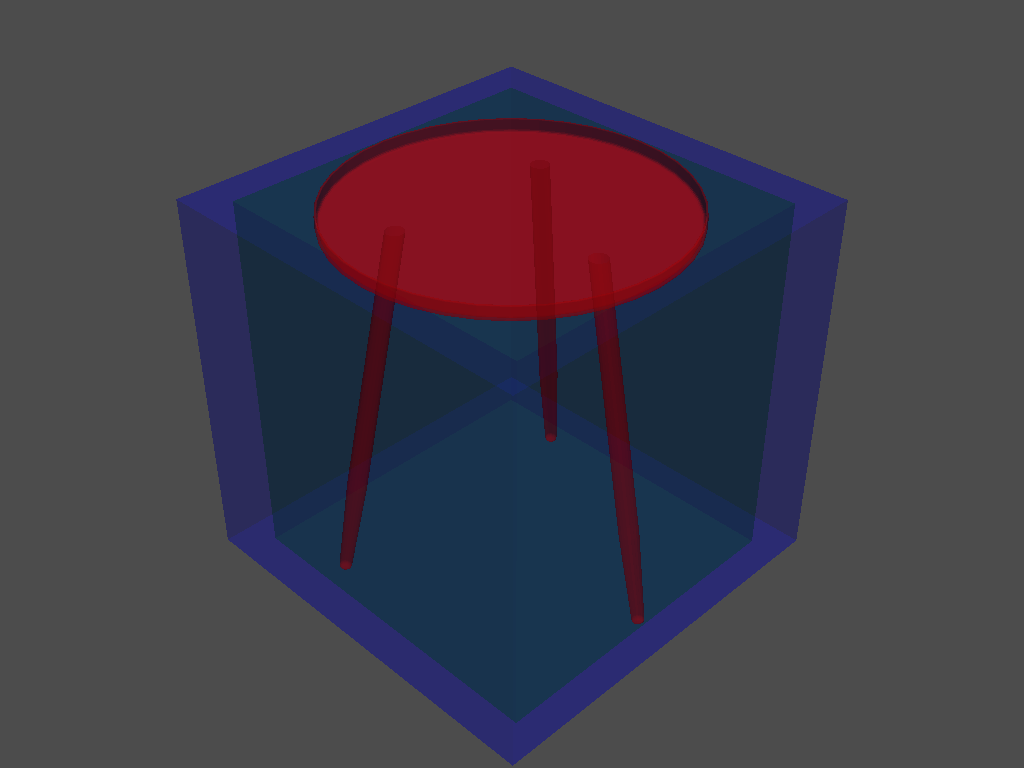

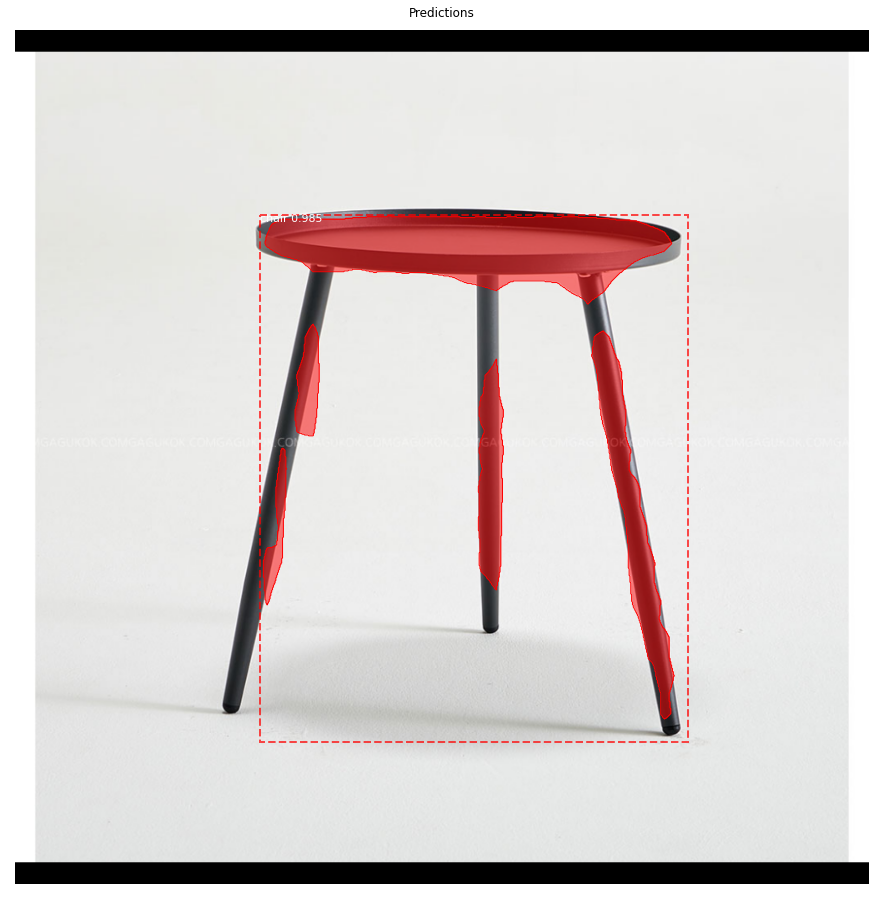

In [3]:
import pyvista as pv
import trimesh
import pandas as pd
import random
import itertools 
import os 

%cd C:\Users\awspe\Desktop\Mask_RCNN-Multi-Class-Detection-master\3Dmodel\convert
Rootpath=r'C:\Users\awspe\Desktop\Mask_RCNN-Multi-Class-Detection-master\3Dmodel\convert'
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

filepath=dataset.image_reference(image_id)
filepath2=filepath.split('\\')


print('----------------------------------')
print('imageclass는 :' ,filepath2[-1][:-4])


path_v1=os.path.join(Rootpath,filepath2[-1][:-4]+str('.stl'))
pv_mesh = pv.read(path_v1) # polydata
tri_mesh = trimesh.load(path_v1) # base.Trimesh

obb = tri_mesh.bounding_box_oriented 
aabb = tri_mesh.bounding_box 

# Bounds 추출 
obb_bounds = obb.bounds
aabb_bounds = aabb.bounds

# trimesh's bounds를 (xMin, xMax, yMin, yMax, zMin, zMax)로 변형 
def align_bounds(bounds):
    temp = []
    for i in range(len(bounds)):
        aa = bounds[i]
        for j in range(len(aa)):
            jj = aa[j]
            temp.append(jj)
    align_bound = [temp[0], temp[3], temp[1], temp[4], temp[2], temp[5]]
    return align_bound 

obb_bounds_a = align_bounds(obb_bounds)
aabb_bounds_a = align_bounds(aabb_bounds)

# pyvista Box 오브젝트 생성 
pv_obb_box = pv.Box(bounds=obb_bounds_a, level=0, quads=True)
pv_aabb_box = pv.Box(bounds=aabb_bounds_a, level=0, quads=True)
#자, 보시면 base.Trimesh 오브젝트로 바운딩 박스를 구하고, 바운딩 박스의 최외곽 점 정보를 얻었다. (bounds) 

#그리고 이 bounds 정보를 사용하여 -- pyvista의 Box 오브젝트를 생성할 수 있게 -- 데이터를 조금 조작해줬다. (def align_bounds)

p = pv.Plotter() # 캔버스 정의 
p.add_mesh(pv_mesh, opacity=0.75, color='red')
p.add_mesh(pv_obb_box, opacity=0.25, color='blue')
p.add_mesh(pv_aabb_box, opacity=0.25, color='green')
p.show()


path=r'C:\Users\awspe\Desktop\Mask_RCNN-Multi-Class-Detection-master\3Dmodel\convert'
mesh = trimesh.load(os.path.join(path,filepath2[-1][:-4]+'.stl'))
mesh.show()

In [4]:
if(filepath2[-1][:-4]=='chair'):
    !python a.py --subject_id chair.stl
elif(filepath2[-1][:-4]=='shelves'):
    !python a.py --subject_id shelves.stl
elif(filepath2[-1][:-4]=='table'):
    !python a.py --subject_id table.stl

table.stl


In [5]:
filepath2[-1]

'table.png'

In [6]:
path=r'C:\Users\awspe\Desktop\Mask_RCNN-Multi-Class-Detection-master\3Dmodel\convert'
mesh = trimesh.load(os.path.join(path,filepath2[-1][:-4]+'.stl'))
mesh.show()